In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import scipy.io as sio
from characterDefinitions import getHandwritingCharacterDefinitions
from torchvision.models import resnet50
import numpy as np

In [11]:
# https://github.com/analyticalmonk/awesome-neuroscience#python
directory = 't5.2019.05.08'
mat = f'./Datasets/{directory}/singleLetters.mat'
data = sio.loadmat(mat)

In [3]:
t = torch.Tensor(data[f'neuralActivityCube_a'])

In [4]:
t.shape


torch.Size([27, 201, 192])

In [38]:
recording = t[0,:,:]

time_series_1 = recording[:,0]
time_series_2 = recording[:,80]
print(time_series_1)
print(time_series_2)

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0.])
tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 0.,
        0., 0., 0.,

In [31]:
size = time_series_1.shape[0]
time_series_1 = time_series_1.reshape([size,1])
size = time_series_2.shape[0]
time_series_2 = time_series_2.reshape([size,1])
time_series_1.shape
time_series_2.shape
np1  = time_series_1.detach().cpu().numpy()
np2  = time_series_2.detach().cpu().numpy()


In [39]:

def jspth(spikes1, spikes2):
    '''Joint Peristimulus Time Histogram
    
    Parameters
    ----------
    spikes1, spikes2: ndarray, shape (n_time, n_trials)
    
    Returns
    -------
    joint_histogram : ndarray, shape (n_time, n_time)
    
    '''
    
    n_time = spikes1.shape[0]
    joint_histogram = np.zeros((n_time, n_time))
    for single_trial_spikes1, single_trial_spikes2 in zip(spikes1.T, spikes2.T):
        joint_histogram += (single_trial_spikes1[:, np.newaxis]
                            * single_trial_spikes2[:, np.newaxis].T)
    
    return joint_histogram

In [59]:
out = jspth(np1, np2)
out.shape

(201, 201)

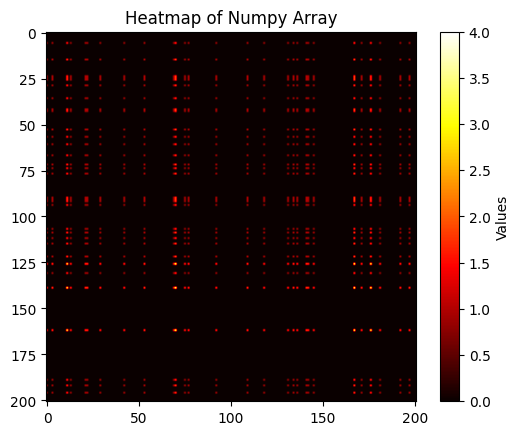

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data

# Plot the array as a heatmap
plt.imshow(out, cmap='hot',interpolation='bilinear')
plt.colorbar(label='Values')
plt.title('Heatmap of Numpy Array')
plt.show()


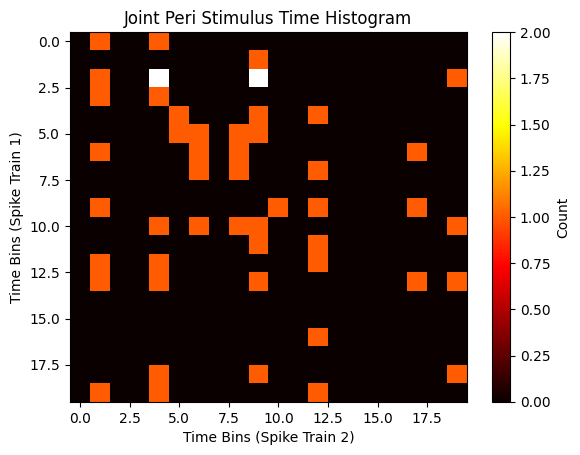

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Define spike trains
spike_train1 = np1
spike_train2 = np2

# Set parameters
bin_size = 0.1  # Time bin size in seconds
time_window = 1.0  # Time window size in seconds

# Convert time window and bin size to bins
window_bins = int(time_window / bin_size)
bin_count = int(len(spike_train1) / window_bins)

# Create JPSTH matrix
jpsth = np.zeros((bin_count, bin_count))

# Iterate over time bins
for i in range(bin_count):
    for j in range(bin_count):
        start1 = i * window_bins
        end1 = start1 + window_bins
        start2 = j * window_bins
        end2 = start2 + window_bins
        jpsth[i, j] = np.sum((spike_train1[start1:end1] > 0) & (spike_train2[start2:end2] > 0))

# Plot JPSTH as heatmap
plt.imshow(jpsth, cmap='hot', aspect='auto')
plt.xlabel('Time Bins (Spike Train 2)')
plt.ylabel('Time Bins (Spike Train 1)')
plt.colorbar(label='Count')
plt.title('Joint Peri Stimulus Time Histogram')
plt.show()
np1

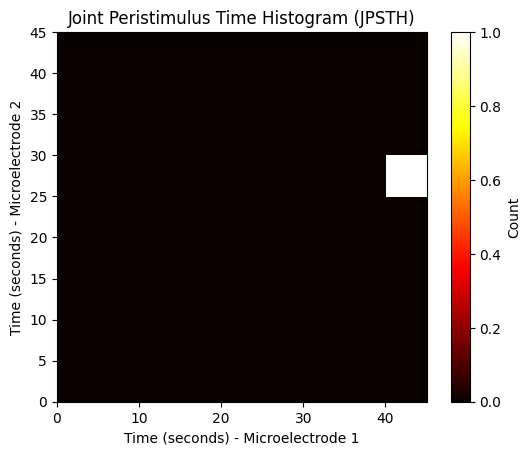

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_psth(spike_train, bin_size):
    """
    Calculate Peristimulus Time Histogram (PSTH) for a spike train.

    Parameters:
        spike_train (numpy array): Spike train (1D array of spike times).
        bin_size (float): The size of the time bins for the PSTH (in seconds).

    Returns:
        psth (numpy array): PSTH for the spike train.
    """
    max_time = np.max(spike_train)
    num_bins = int(np.ceil(max_time / bin_size))

    psth, _ = np.histogram(spike_train, bins=num_bins, range=(0, max_time))
    psth = psth / bin_size  # Convert to spike rate by dividing by bin size

    return psth

def jpsth(spike_train_1, spike_train_2, bin_size, window_size):
    """
    Calculate the Joint Peristimulus Time Histogram (JPSTH) of two spike trains.

    Parameters:
        spike_train_1 (numpy array): Spike train 1 (1D array of spike times).
        spike_train_2 (numpy array): Spike train 2 (1D array of spike times).
        bin_size (float): The size of the time bins for the histogram (in seconds).
        window_size (float): The size of the window around each spike to consider spikes for the histogram (in seconds).

    Returns:
        jpsth_data (2D numpy array): The JPSTH data as a 2D histogram.
    """
    max_time = max(np.max(spike_train_1), np.max(spike_train_2))
    num_bins = int(np.ceil(max_time / bin_size))

    # Ensure both spike trains have the same length by padding with zeros if necessary
    num_samples = max(len(spike_train_1), len(spike_train_2))
    spike_train_1_padded = np.pad(spike_train_1, (0, num_samples - len(spike_train_1)))
    spike_train_2_padded = np.pad(spike_train_2, (0, num_samples - len(spike_train_2)))

    jpsth_data, _, _ = np.histogram2d(spike_train_1_padded, spike_train_2_padded, bins=[num_bins, num_bins],
                                      range=[[0, max_time], [0, max_time]])

    half_window = int(window_size / bin_size / 2)
    for i in range(num_bins):
        jpsth_data[i] = np.roll(jpsth_data[i], half_window - i)
    
    jpsth_data = jpsth_data.T

    return jpsth_data

# Example usage:
# Generate synthetic spike train data for demonstration purposes
spike_train_1 = np1
spike_train_2 = np1

bin_size = 5  # 5 seconds bin size
window_size = 50  # 50 seconds window size

psth_1 = calculate_psth(spike_train1,bin_size)
psth_2 = calculate_psth(spike_train2,bin_size)
jpsth_data = jpsth(psth_1, psth_2, bin_size, window_size)


# Display the JPSTH as a heatmap
plt.imshow(jpsth_data, cmap='hot', origin='lower', extent=[0, len(jpsth_data) * bin_size, 0, len(jpsth_data) * bin_size])
plt.xlabel('Time (seconds) - Microelectrode 1')
plt.ylabel('Time (seconds) - Microelectrode 2')
plt.title('Joint Peristimulus Time Histogram (JPSTH)')
plt.colorbar(label='Count')
plt.show()
